<a href="https://colab.research.google.com/github/mukeshyadav4747/ML/blob/main/Spotify_Music_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Music Popularity

The given dataset contains various attributes related to individual music tracks. Key features include:

Energy: A measure of intensity and activity.

Valence: A measure of the musical positiveness conveyed by a track.

Danceability: Describes how suitable a track is for dancing.

Loudness: Overall loudness of a track in decibels (dB).

Acousticness: Confidence measure of whether the track is acoustic.

Tempo: The speed or pace of a given piece, measured in beats per minúte (BPM).

Speechiness: Measures the presence of spoken words in a track.

Liveness: Detects the presence of an audience in the recording.

Popularity: The target variable indicating the popularity score of the track.

The dataset includes 227 music tracks, each described by the above features along with additional metadata like track name, artists, album name, and release date.

# Problem

The objective is to develop a predictive model that can accurately estimate the popularity of music tracks based on their audio features. Accurate predictions music popularity can assist music streaming platforms in better understanding user preferences, enhancing recommendation systems, and optimizing playlis to boost user engagement.

Specifically, the goal is to build a regression model using machine learning techniques to predict the popularity score of a track by finding the most relevant features.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
spotify_data = pd.read_csv("/content/Spotify_data.csv")

In [ ]:
print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [ ]:
spotify_data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

Now let's get started with EDA. As popularity is the target variable. I will have a look at the relationship between all the music features with popularity:

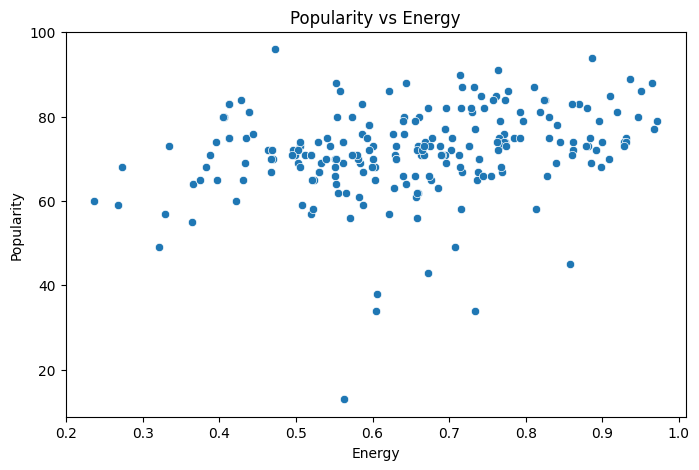

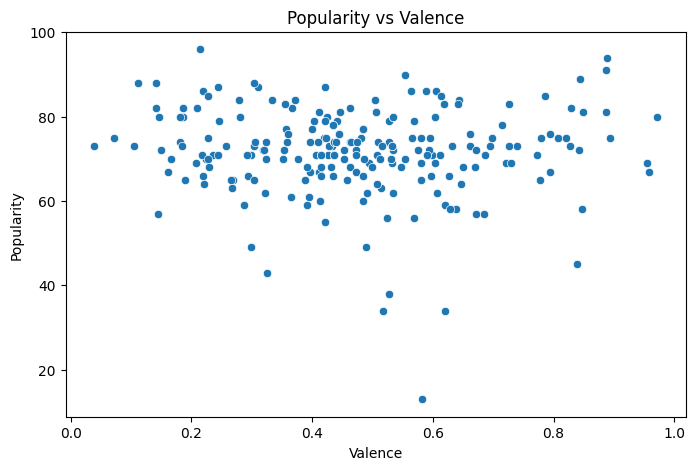

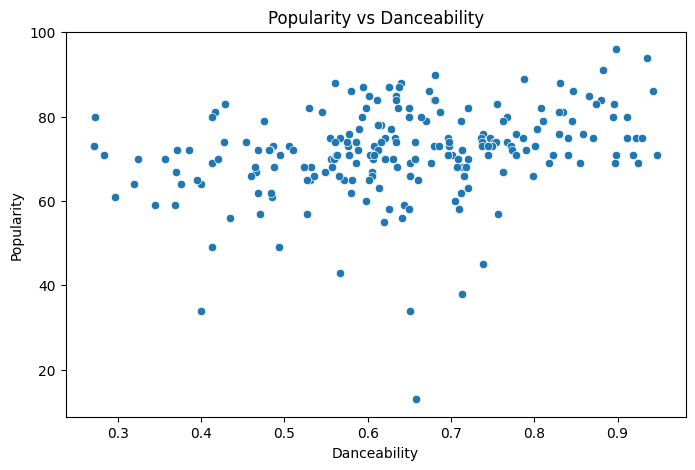

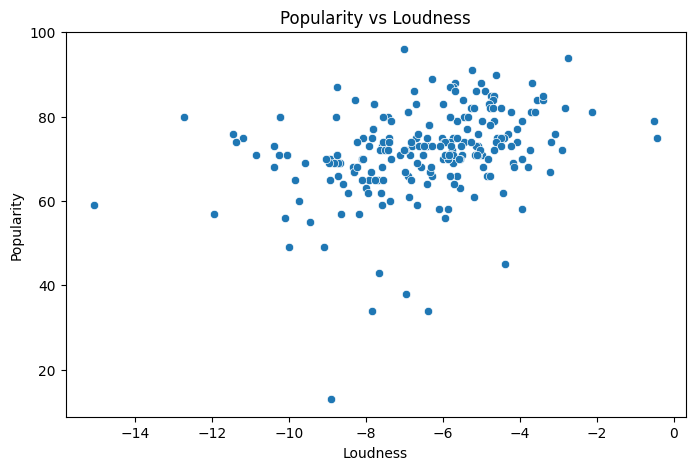

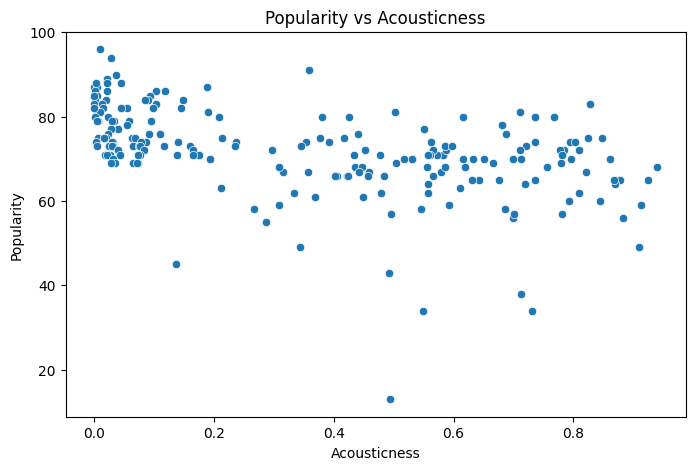

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Energy','Valence','Danceability', 'Loudness','Acousticness']
for feature in features:
  plt.figure(figsize=(8,5))
  sns.scatterplot(data= spotify_data,x= feature, y='Popularity')
  plt.title(f'Popularity vs {feature}')
  plt.show()

From these visualizations, we can observe that higher energy levels and danceability tend to correlate positively with higher popularity scores. Conversely, increased acousticness and lower loudness levels generally correspond with lower popularity, suggesting that more energetic and less acoustic tracks are favoured. Valence shows a weaker, less clear relationship with popularity, indicating that the emotional positivity of a track alone doesn't strongly predict its popularity.

Now, let's have a look at the correlation between all the features:

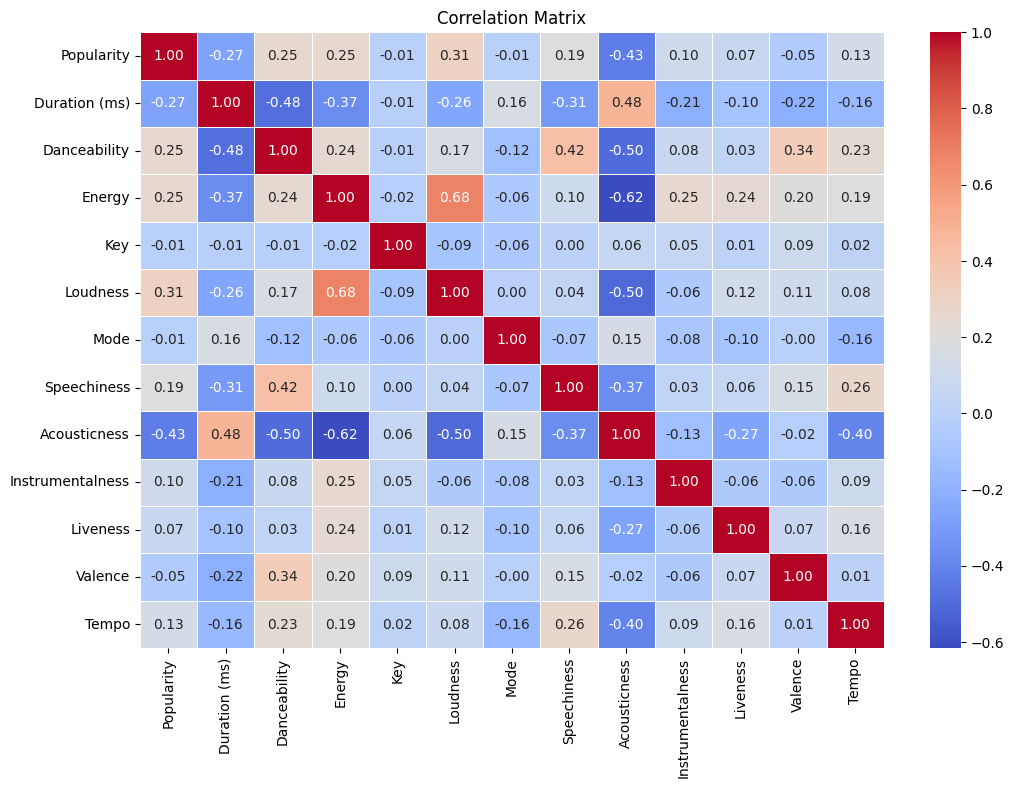

In [ ]:
numeric_columns = spotify_data.select_dtypes(include={'float64','int64'}).columns
numeric_data = spotify_data[numeric_columns]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt='.2f' , linewidths =0.5)
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. There is a moderate negative cor correlation between popularity and and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular. Energy also has a positive correlation with popularity (0.25).

Now, let's have a look of the distribution of all the music features:

In [ ]:
import seaborn as sns

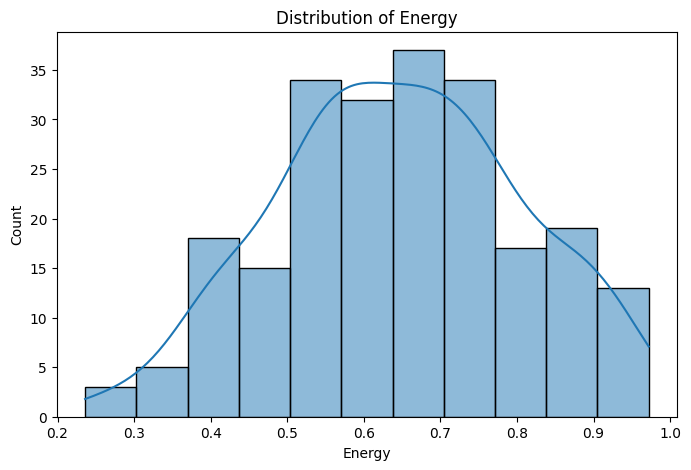

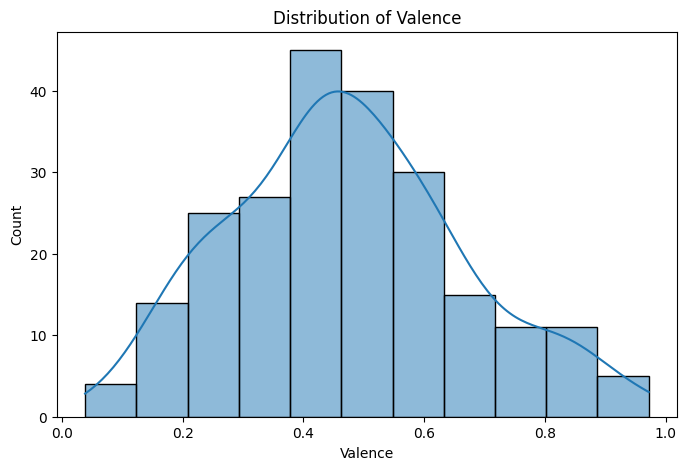

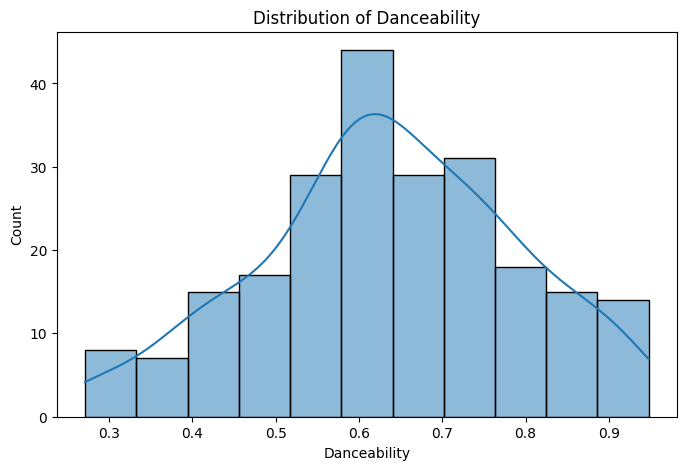

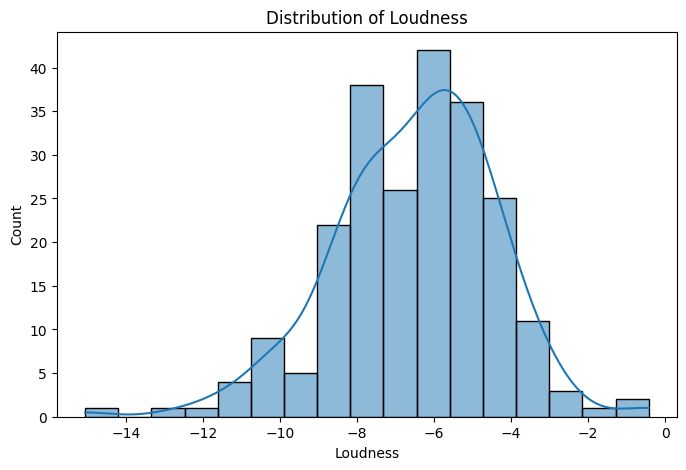

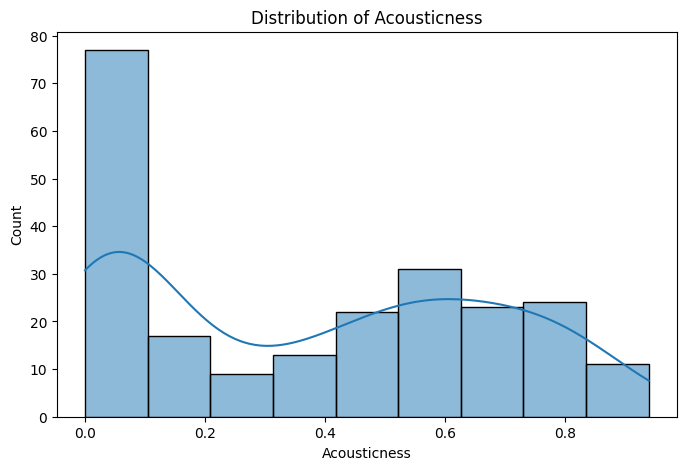

In [ ]:
for feature in features:
  plt.figure(figsize=(8,5))
  sns.histplot(spotify_data[feature],kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

The distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. Valence and danceability also follow a similar distribution, with most tracks having mid-range values, which suggests an even mix of emotionally positive and danceable tracks. Loudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. Acousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.



# Feature Selection and Model Training

Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:

Energy

Valence

Danceability

Loudness

Acousticness

Tempo

Speechiness

Liveness

These features capture various audio characteristics that influence the popularity of music tracks.

The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. So, let’s split and scale the data and then train the model using the random forest regression algorithm:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
features = ['Energy', 'Valence', 'Danceability', 'Acousticness','Tempo','Speechiness','Liveness']
x= spotify_data[features]
y = spotify_data['Popularity']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# normalize the features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# define the paramenter grid for Random Forest

param_grid = {'n_estimators':[50,100,200],'max_features':['auto','sqrt','log2'],
              'max_depth':[10,20,30,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state =42),param_grid, refit= True, verbose = 2,cv =5)

In [ ]:
grid_search_rf.fit(x_train_scaled,y_train)
best_params_rf= grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf =best_rf_model.predict(x_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Now let's have a look at the actual vs predicted results of the test data:

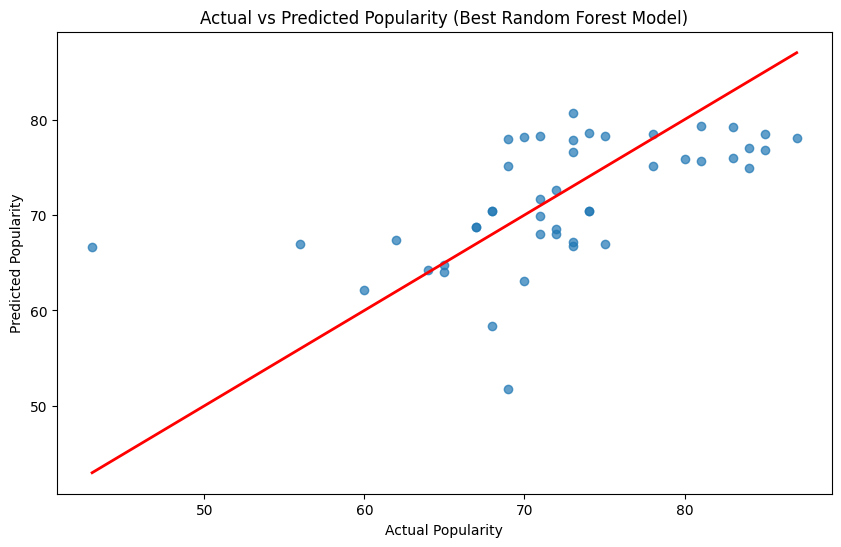

In [ ]:
# make predictions

y_pred_best_rf = best_rf_model.predict(x_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color= 'red',linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. However, there are some deviations, particularly at lower popularity values, which suggest areas where the model's predictions are less precise.



# Summary

So, this is how we can train a Machine Learning model for the task of Music popularity prediction with Python, Predicting the popularity of music can help music streaming platforms understand user preferences, optimize playlists and enhance recommendation systems to improve user engagement and satisfaction.